# Q learning on the Grid World

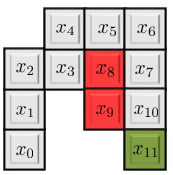

Defines the grid world dynamics presented in the lecture. The actions are defined as follows:  
u = 0 : go right  
u = 1 : go up  
u = 2 : go left  
u = 3 : go down  
The input is the current state, and chosen action, the output is the next state and the reward.

In [1]:
import numpy as np

def gridworld(x, u):
    # Transition Matrix
    T = np.array([
        [0, 1, 0, 0],
        [1, 2, 1, 0],
        [3, 2, 2, 1],
        [8, 4, 2, 3],
        [5, 4, 4, 3],
        [6, 5, 4, 8],
        [6, 6, 5, 7],
        [7, 6, 8, 10],
        [7, 5, 3, 9],
        [10, 8, 9, 9],
        [10, 7, 9, 11],
        [11, 11, 11, 11]
    ], dtype = int)
    
    # Get the next state
    x2 = T[x, u]
    
    # Reward
    r = -1
    if x2 in [8, 9]:
        r = -2
    elif x ==11:
        r = 0
    
    # Return the next state and reward
    return x2, r

In [3]:
gridworld(3, 1)

(4, -1)

Helper functions needed in the qlearning algorithm

In [8]:
def get_max_Q(Q, x):
    return np.max(Q[x, :])

def eps_greedy(Q, x, epsilon):
    # Find best action
    best_u = np.argmax(Q[x, :])
    # Define probabilities for each action
    prob_vec = np.ones(4)*epsilon/3
    prob_vec[best_u] = 1-epsilon
    # Random draw according to the probabilities
    sumprob = 0
    draw = np.random.rand()
    for i in range(4):
        sumprob += prob_vec[i]
        if sumprob>draw:
            return i
    

The Q-learning algorithm   
$Q_{k+1}(x_t, u_t) = (1-\alpha)\cdot Q_{k}(x_t, u_t) + \alpha \left( r_{t+1} + \max_u  Q_{k}(x_{t+1}, u) \right)$

In [14]:
def qlearn(Q, epsilon, alpha, Nepisodes):
    for i in range(Nepisodes):
        x = 0
        Nsteps = 0
        while x!=11:
            u = eps_greedy(Q, x, epsilon)
            x2, r = gridworld(x, u)
            Nsteps += 1
            Q[x, u] = (1-alpha)*Q[x, u] + alpha*(r + get_max_Q(Q, x2))
            x = x2
        print(f"Episode {i}: number of steps {Nsteps}")
    

In [22]:
# Initialize Q and define parameter
Q = np.zeros((12, 4))
epsilon = 0.75
alpha = 0.8
Nepisodes = 50

# Start the Qlearning algorithm
qlearn(Q, epsilon, alpha, Nepisodes)

Episode 0: number of steps 406
Episode 1: number of steps 193
Episode 2: number of steps 17
Episode 3: number of steps 253
Episode 4: number of steps 132
Episode 5: number of steps 141
Episode 6: number of steps 77
Episode 7: number of steps 49
Episode 8: number of steps 132
Episode 9: number of steps 53
Episode 10: number of steps 140
Episode 11: number of steps 130
Episode 12: number of steps 139
Episode 13: number of steps 216
Episode 14: number of steps 177
Episode 15: number of steps 64
Episode 16: number of steps 161
Episode 17: number of steps 59
Episode 18: number of steps 106
Episode 19: number of steps 510
Episode 20: number of steps 22
Episode 21: number of steps 253
Episode 22: number of steps 97
Episode 23: number of steps 90
Episode 24: number of steps 77
Episode 25: number of steps 106
Episode 26: number of steps 200
Episode 27: number of steps 239
Episode 28: number of steps 62
Episode 29: number of steps 141
Episode 30: number of steps 44
Episode 31: number of steps 73

In [23]:
# Try out the greedy policy
qlearn(Q, 0, alpha, 1)

Episode 0: number of steps 7


In [24]:
# Lets have a look at the Q function it learned.
Q

array([[-9., -8., -9., -9.],
       [-8., -7., -8., -9.],
       [-6., -7., -7., -8.],
       [-5., -6., -7., -6.],
       [-5., -6., -6., -6.],
       [-4., -5., -6., -5.],
       [-4., -4., -5., -3.],
       [-3., -4., -5., -2.],
       [-3., -5., -6., -4.],
       [-2., -5., -4., -4.],
       [-2., -3., -4., -1.],
       [ 0.,  0.,  0.,  0.]])

# Evaluation

https://evasys.zv.tum.de/evasys/online.php?p=AIAT-11

<img src="RL-code.png" width="400">